# Analyzing U.S. Wildfires
---

## Data Exploration

### Questions to Answer:
#### 1. What locations are the most and least fire-prone? 
- Look at number of occurrences of fire by location
 - Also view this in relation to size of state -- of course bigger states would have more fires than smaller ones
- Make geographic plots
- Since there is so much data, it may be a good idea to focus on a single location at a time
 - Texas could be a good focus since that's where Codeup is located

#### 2. How does fire size vary by location?
- Look at fire_size by location

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_fires

In [2]:
# wrangle data
fires = wrangle_fires()
fires.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


In [39]:
# ignore pink warnings
import warnings
warnings.filterwarnings('ignore')

#### What is the size range for fires in this dataset?

In [22]:
# view range of fire size
fires.fire_size.min(), fires.fire_size.max()

(1e-05, 662700.0)

In [9]:
# view states included in dataset
fires.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

There is wildfire data for all 50 US states as well as Puerto Rico and Washington, DC.

CA, GA, TX, NC, FL have the highest occurrences of wildfires from 1992-2018.

Since there is so much data to go through, I'll start by investigating the fires located in Texas.

In the graph below, I want to show differences in fires based on both time and size. I was able to show the year differences fairly well but I'll need to use a different method for showing size. One way to accomplish this may be to bin the size values into categories so it'll be easier for seaborn to represent those differences visually considering how many data points it needs to plot. I'll do this on my next run-through to give myself a break from staring at this plot. For now, I'll move onto some other exploration.

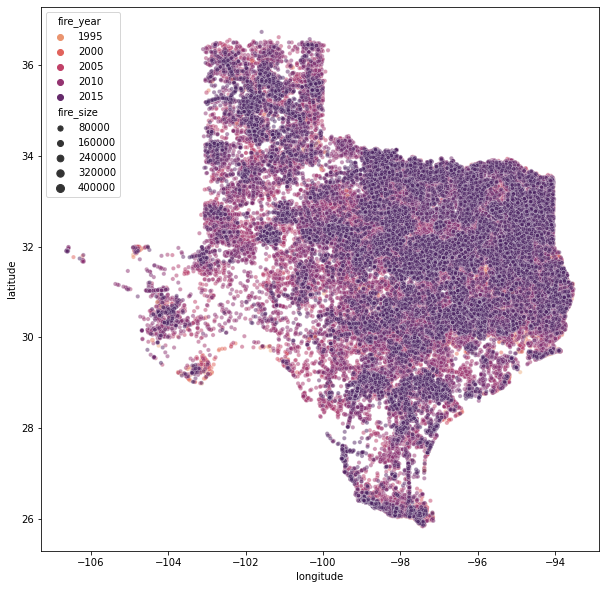

In [60]:
# plot fires in Texas
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', data=fires[fires.state=='TX'], size='fire_size', hue='fire_year', palette='flare', alpha=0.5);
# light to dark, oldest to newest

In [25]:
# isolate texas fires into separate dataframe
tx_fires = fires[fires.state=='TX']
tx_fires.head()

,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.0,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.0,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.0,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.3,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.0,31.354167,-95.085278,TX


In [28]:
# view shape of subset df
tx_fires.shape

(167061, 8)

In [26]:
# view timeframe of texas fires
tx_fires.fire_year.min(), tx_fires.fire_year.max()

(1992, 2018)

In [27]:
# check for nulls in tx data
tx_fires.isna().sum()

fire_year              0
discovery_date         0
general_cause          0
cont_date         139043
fire_size              0
latitude               0
longitude              0
state                  0
dtype: int64

In [30]:
# remove rows with null cont_date
tx_fires = tx_fires[tx_fires.cont_date.notnull()]
tx_fires

,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.00,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.00,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.00,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.30,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.00,31.354167,-95.085278,TX
...,...,...,...,...,...,...,...,...
2108929,2018,2018-11-29,Missing data/not specified/undetermined,2018-11-29,31.21,33.422500,-101.959667,TX
2108979,2018,2018-12-05,Missing data/not specified/undetermined,2018-12-05,50.00,30.014200,-94.805183,TX
2109052,2018,2018-12-14,Missing data/not specified/undetermined,2018-12-16,1400.00,27.837783,-99.872783,TX
2109106,2018,2018-12-21,Missing data/not specified/undetermined,2018-12-21,8.00,33.085200,-96.155500,TX


I'm interested in seeing how long these fires burned/were considered to be uncontained, so to look into this I'll create a new column using discovery_date and cont_date.

In [32]:
# create new column
tx_fires['days_uncontrolled'] = tx_fires.cont_date-tx_fires.discovery_date
tx_fires

<ipython-input-32-d362e06e4d00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_fires['days_uncontrolled'] = tx_fires.cont_date-tx_fires.discovery_date


,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state,days_uncontrolled
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.00,33.786111,-96.150000,TX,0 days
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.00,31.312500,-94.270833,TX,0 days
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.00,33.345833,-97.595833,TX,1 days
286,2005,2005-04-03,Smoking,2005-04-03,0.30,31.386667,-95.150556,TX,0 days
287,2005,2005-04-07,Natural,2005-04-08,55.00,31.354167,-95.085278,TX,1 days
...,...,...,...,...,...,...,...,...,...
2108929,2018,2018-11-29,Missing data/not specified/undetermined,2018-11-29,31.21,33.422500,-101.959667,TX,0 days
2108979,2018,2018-12-05,Missing data/not specified/undetermined,2018-12-05,50.00,30.014200,-94.805183,TX,0 days
2109052,2018,2018-12-14,Missing data/not specified/undetermined,2018-12-16,1400.00,27.837783,-99.872783,TX,2 days
2109106,2018,2018-12-21,Missing data/not specified/undetermined,2018-12-21,8.00,33.085200,-96.155500,TX,0 days


In [36]:
# look at value counts for uncontrolled windows
tx_fires.days_uncontrolled.value_counts().sort_index()

0 days      23623
1 days       2905
2 days        657
3 days        289
4 days        131
5 days         96
6 days         56
7 days         47
8 days         25
9 days         23
10 days        26
11 days        12
12 days        12
13 days        15
14 days        12
15 days         5
16 days         5
17 days         3
18 days         1
19 days         5
20 days         5
21 days         1
22 days         1
23 days         1
24 days         1
25 days         2
26 days         5
27 days         1
28 days         2
29 days         3
30 days         6
31 days         9
32 days         3
33 days         2
34 days         1
35 days         1
36 days         1
37 days         1
39 days         1
45 days         1
48 days         2
59 days         1
120 days        1
133 days        1
178 days        1
244 days        1
365 days       13
366 days        1
371 days        1
Name: days_uncontrolled, dtype: int64

In [38]:
# longest uncontrolled fire in Texas
tx_fires[tx_fires.days_uncontrolled == '371 days']

,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state,days_uncontrolled
598747,2000,2000-09-12,Missing data/not specified/undetermined,2001-09-18,80.0,31.49792,-94.98125,TX,371 days


Lori's fantastic suggestion: In the slides be sure to have a reference for how big something is (football field, two schoolbuses, etc.)

In [61]:
# recreate df for all tx fires
all_tx_fires = fires[fires.state=='TX']
all_tx_fires

,fire_year,discovery_date,general_cause,cont_date,fire_size,latitude,longitude,state
283,2005,2005-01-24,Arson/incendiarism,2005-01-24,3.0,33.786111,-96.150000,TX
284,2005,2005-01-25,Debris and open burning,2005-01-25,55.0,31.312500,-94.270833,TX
285,2005,2005-03-12,Recreation and ceremony,2005-03-13,2.0,33.345833,-97.595833,TX
286,2005,2005-04-03,Smoking,2005-04-03,0.3,31.386667,-95.150556,TX
287,2005,2005-04-07,Natural,2005-04-08,55.0,31.354167,-95.085278,TX
...,...,...,...,...,...,...,...,...
2118712,2018,2018-01-22,Missing data/not specified/undetermined,NaT,2153.0,32.725283,-97.558050,TX
2118713,2018,2018-01-22,Missing data/not specified/undetermined,NaT,585.0,33.899167,-98.848833,TX
2118743,2018,2018-03-18,Missing data/not specified/undetermined,NaT,400.0,31.580000,-102.947222,TX
2118744,2018,2018-05-09,Missing data/not specified/undetermined,NaT,1000.0,34.760175,-101.246832,TX


In [72]:
# resample by year's total fires
tx_fires_y = all_tx_fires.resample('Y', on='discovery_date').count()
tx_fires_y.shape

(27, 8)